# Trenzado
-----------
Primeros tres experimentos

In [2]:
# show data/report.png
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

Text(0.5, 1.0, 'Trenzado')

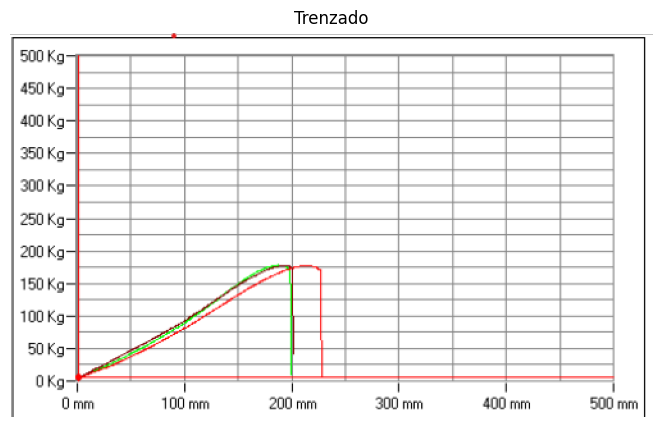

In [3]:
# show data/report.png

plt.figure(figsize=(10, 5))
plt.imshow(np.array(plt.imread('data/report.png')))
plt.axis('off')
plt.title('Trenzado')

In [4]:
radius = 4  # mm
radius_hilo = 0.27 # mm
rho_lineal = 176.6 # m/kg
nhilos = 4 # 16 hebras de 4 hilos
nint   = 15
rho_ext = 540 # Deniers = gr/9000m
rho_int = 540 # Deniers = gr/9000m

In [5]:
resis_trac   = [ 178.5  , 177   , 177.5 ] # Kg
alargamiento = [ 187.2  , 209.8 , 193.3 ] # mm

In [6]:
resis_trac_N = np.array(resis_trac) * 9.81
Area         = np.pi * (radius_hilo)**2 * (16*nhilos)
sigma        = resis_trac_N / Area # MPa

In [7]:
df = pd.DataFrame({'Alargamiento (mm)': alargamiento,
                     'Tensión (MPa)': sigma})

In [8]:
df

,Alargamiento (mm),Tensión (MPa)
0,187.2,119.467521
1,209.8,118.463592
2,193.3,118.798235


In [9]:
# data/data.csv
df_exp = pd.read_csv('data/data.csv')
df_exp = [ df_exp.iloc[1:,id:(id+2)]  for id in range(0,df_exp.shape[1],2) ]
# rm nan
for i in range(len(df_exp)):
    df_exp[i] = df_exp[i].dropna()
    df_exp[i].columns = ['alargamiento [mm]','fuerza [kg]']
    df_exp[i]['alargamiento [mm]'] = df_exp[i]['alargamiento [mm]'].astype(float)
    df_exp[i]['fuerza [kg]'] = df_exp[i]['fuerza [kg]'].astype(float)
    #to MPa
    df_exp[i]['stress [MPa]'] = df_exp[i]['fuerza [kg]']*9.81/Area # 
    ################################
    long = 880 # mm !!! Corregir
    ################################
    df_exp[i]['strain [-]'] = df_exp[i]['alargamiento [mm]']/long #
    # add new column exp label

# concat data add new column exp label


Text(0.5, 1.0, 'Trenzado')

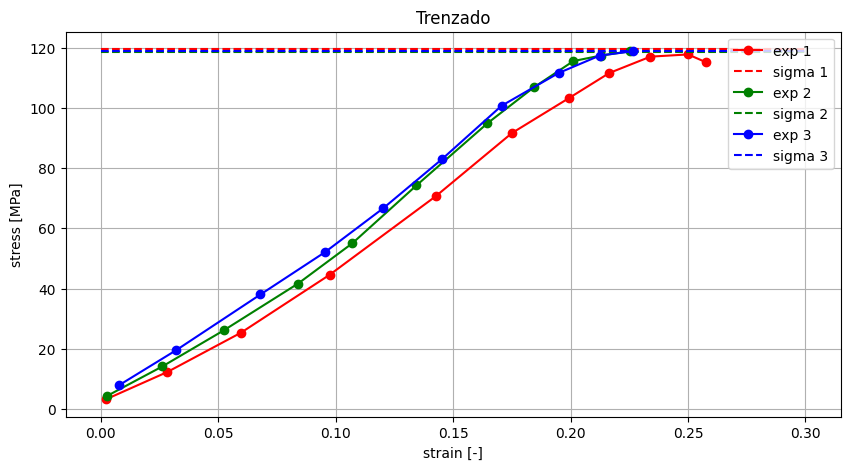

In [10]:
plt.figure(figsize=(10,5))
color = ['r','g','b']
for i in range(len(df_exp)):
    plt.plot(df_exp[i]['strain [-]'],df_exp[i]['stress [MPa]'],'o-',label=f'exp {i+1}',c=color[i])
    # horizontal line
    sigma = df["Tensión (MPa)"][i]
    plt.hlines(sigma,0,0.3,linestyles='dashed',label=f'sigma {i+1}',colors=color[i])
plt.legend()
plt.grid()
plt.xlabel('strain [-]')
plt.ylabel('stress [MPa]')
title = "Trenzado"
plt.title(title)

In [11]:
for i in range(len(df_exp)):
    # csv
    df_exp[i].to_csv(f'data/exp{i+1}.csv',index=False)

In [12]:
from tools.basic.loadsavejson import loadjson

In [13]:
results = loadjson("../../../../scripts/C01_MultiYarn/validation/data/results.json")

In [14]:
results["df"]

,tensile strength [MPa],strain [-]
0,141.78,0.11422
1,134.50,0.09322
2,140.28,0.13473


In [15]:
curves = [ results["df_exp"]["exp "+str(i+1)] for i in range(3) ]

Text(0, 0.5, 'stress [MPa]')

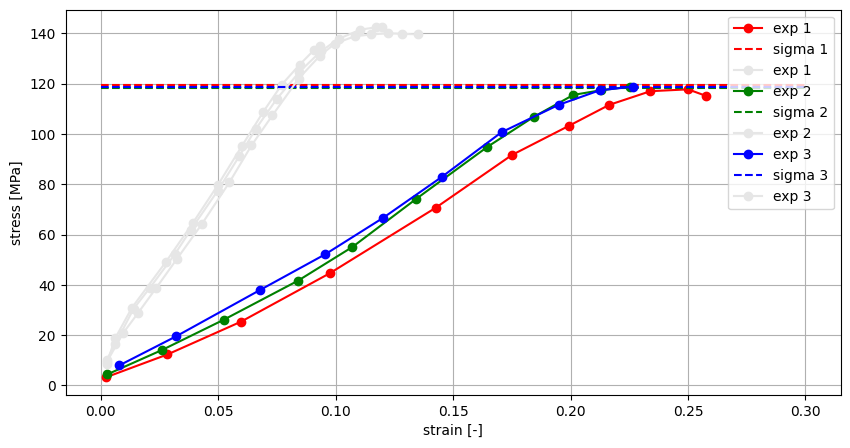

In [15]:
plt.figure(figsize=(10,5))
color = ['r','g','b']
for i in range(len(df_exp)):
    plt.plot(df_exp[i]['strain [-]'],df_exp[i]['stress [MPa]'],'o-',label=f'exp {i+1}',c=color[i])
    # horizontal line
    sigma = df["Tensión (MPa)"][i]
    plt.hlines(sigma,0,0.3,linestyles='dashed',label=f'sigma {i+1}',colors=color[i])
    plt.plot(curves[i]['strain [-]'],curves[i]['stress [MPa]'],'o-',label=f'exp {i+1}',c=[0.9,0.9,0.9])
plt.legend()
plt.grid()
plt.xlabel('strain [-]')
plt.ylabel('stress [MPa]')


In [23]:
results

{'df':    Alargamiento (mm)  Tensión (MPa)
 0              187.2     119.467521
 1              209.8     118.463592
 2              193.3     118.798235,
 'df_exp_1':     alargamiento [mm]  fuerza [kg]  stress [MPa]  strain [-]
 1            1.976788     4.867002      3.257415    0.002246
 2           24.954240    18.405356     12.318444    0.028357
 3           52.533563    37.894631     25.362340    0.059697
 4           85.704746    66.579140     44.560475    0.097392
 5          125.453523   105.541031     70.637117    0.142561
 6          154.039849   136.923286     91.640816    0.175045
 7          175.385397   154.243660    103.233096    0.199302
 8          190.491854   166.692424    111.564878    0.216468
 9          205.917673   174.817208    117.002681    0.233997
 10         220.018191   175.913533    117.736436    0.250021
 11         226.568138   172.136830    115.208742    0.257464,
 'df_exp_2':     alargamiento [mm]  fuerza [kg]  stress [MPa]  strain [-]
 1            

In [24]:
results = dict()
results["df"] = df
for i in range(len(df_exp)):
    results["df_exp_"+str(i+1)] = df_exp[i]

from tools.basic.loadsavejson import savejson

savejson(results,"data/results.json")

In [16]:
E = 120/0.2

In [17]:
E

600.0

In [18]:
L = 8 # mm
ΔL = 1e-3 # mm
# epsilon Unicode 
ε = ΔL/L 
σ = E*ε
print(σ,"MPa")

0.075 MPa
